## Get all the costs results :

In [1]:
import pandas as pd
sourceCPLEX = "D:/DTU-Courses/DTU-Thesis/berth_allocation/MCBAP-multi-port-berth-allocation-problem/results_jobs/benchmarks_CPLEX/CPLEX_N4_N15_results_5min.csv"
sourceHeur = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_HEUR"
algo_folder="correctedGRASP"
expnb=4
exp="exp4"
Nmin=11
Nmax=15

dataCPLEX = pd.read_csv(sourceCPLEX)
dataHeur = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/N15_N15.csv")

for i in range(Nmin, Nmax):
    this_dataHeur = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/N{i}_N{i}.csv")
    dataHeur = pd.concat([dataHeur, this_dataHeur], ignore_index=True)
    
merged_df = pd.merge(dataCPLEX, dataHeur, how='inner', on=['Seed', 'N', 'Nout', 'qli'])
merged_df["diff"] = (merged_df["HeurCost"] - merged_df["CPLEX"])/merged_df["CPLEX"]*100
merged_df.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/N{Nmin}_N{Nmax}_diff{expnb}.csv", index=False)


In [2]:
merged_df[merged_df["N"]>0]

,Seed,N,Nout,qli,TimeCPLEX,CPLEX,Box,HeurCost,diff
5,1.0,11.0,3.0,10.0,33,415272.0,NaN,506977,22.083117
6,2.0,11.0,3.0,10.0,1,444047.0,NaN,552904,24.514747
7,3.0,11.0,3.0,10.0,1,419877.0,NaN,513844,22.379649
8,4.0,11.0,3.0,10.0,3,409887.0,NaN,490656,19.705187
9,5.0,11.0,3.0,10.0,5,515255.0,NaN,677265,31.442684
...,...,...,...,...,...,...,...,...,...
300,1.0,15.0,5.0,80.0,301,684403.0,NaN,1520005,122.092101
301,2.0,15.0,5.0,80.0,301,684801.0,NaN,1211373,76.894163
302,3.0,15.0,5.0,80.0,301,722436.0,NaN,1299174,79.832400
303,4.0,15.0,5.0,80.0,301,686506.0,"####The port 1, the first box : [110,142] and ...",1315446,91.614640


## Get results in json :

In [3]:
from getdict_results import *

In [4]:
algo_folder="correctedGRASP"
exp="exp2"
seed=4
Nin=15
qli=80
Nout=5
iteration_number = 40
iter_to_plot = iteration_number
nb_iter=39

In [5]:
results = getiterfromfileHEUR(Nin,Nout,seed,qli,algo_folder,exp)
results

23    [0.3333, 0.3333, 0.3333]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype

{1: {'x': {1: {1: 1, 2: 18},
   2: {1: 4, 2: 14},
   3: {1: 8, 2: 14},
   4: {1: 19, 2: 1, 3: 15},
   5: {1: 17, 2: 1},
   6: {1: 3, 2: 5},
   7: {1: 6, 2: 15, 3: 15},
   8: {1: 7, 2: 4},
   9: {1: 17, 2: 15, 3: 6},
   10: {1: 5, 2: 8, 3: 11},
   11: {1: 14, 2: 15},
   12: {1: 10, 2: 12, 3: 11},
   13: {1: 5, 2: 7},
   14: {1: 14, 2: 1, 3: 7},
   15: {1: 3, 2: 8},
   16: {1: 9.0},
   17: {1: 5.0},
   18: {1: 12.0},
   19: {1: 5.0},
   20: {1: 9.0},
   21: {1: 1.0},
   22: {1: 20.0},
   23: {1: 9.0},
   24: {1: 12.0},
   25: {1: 12.0},
   26: {1: 5.0},
   27: {1: 9.0},
   28: {1: 16.0},
   29: {1: 1.0},
   30: {1: 9.0}},
  'y': {1: {1: 6, 2: 80},
   2: {1: 17, 2: 92},
   3: {1: 40, 2: 77},
   4: {1: 13, 2: 81, 3: 120},
   5: {1: 14, 2: 66},
   6: {1: 100, 2: 130},
   7: {1: 40, 2: 98, 3: 143},
   8: {1: 122, 2: 160},
   9: {1: 43, 2: 79, 3: 108},
   10: {1: 21, 2: 66, 3: 142},
   11: {1: 20, 2: 56},
   12: {1: 5, 2: 46, 3: 113},
   13: {1: 42, 2: 78},
   14: {1: 7, 2: 54, 3: 145},
   15

## Get vizualization from the sol 

['[1,1]=12.0\r', '[1,2]=8.0\r', '[10,1]=8.0\r', '[10,2]=16.0\r', '[10,3]=18.0\r', '[11,1]=16.0\r', '[11,2]=15.25\r', '[12,1]=9.89342\r', '[12,2]=12.0\r', '[12,3]=8.0\r', '[13,1]=1.0\r', '[13,2]=16.0\r', '[14,1]=14.5\r', '[14,2]=4.0\r', '[14,3]=4.0\r', '[15,1]=5.0\r', '[15,2]=8.0\r', '[16,1]=9.0\r', '[17,1]=5.0\r', '[18,1]=12.0\r', '[19,1]=5.0\r', '[2,1]=18.0\r', '[2,2]=19.0\r', '[20,1]=9.0\r', '[21,1]=1.0\r', '[22,1]=20.0\r', '[23,1]=9.0\r', '[24,1]=12.0\r', '[25,1]=12.0\r', '[26,1]=5.0\r', '[27,1]=9.0\r', '[28,1]=16.0\r', '[29,1]=1.0\r', '[3,1]=1.0\r', '[3,2]=12.0\r', '[30,1]=9.0\r', '[4,1]=19.0\r', '[4,2]=0.0\r', '[4,3]=14.0\r', '[5,1]=13.125\r', '[5,2]=12.0\r', '[6,1]=1.0\r', '[6,2]=4.0\r', '[7,1]=5.89342\r', '[7,2]=16.0\r', '[7,3]=15.25\r', '[8,1]=5.0\r', '[8,2]=4.0\r', '[9,1]=13.0\r', '[9,2]=5.0\r', '[9,3]=13.0']


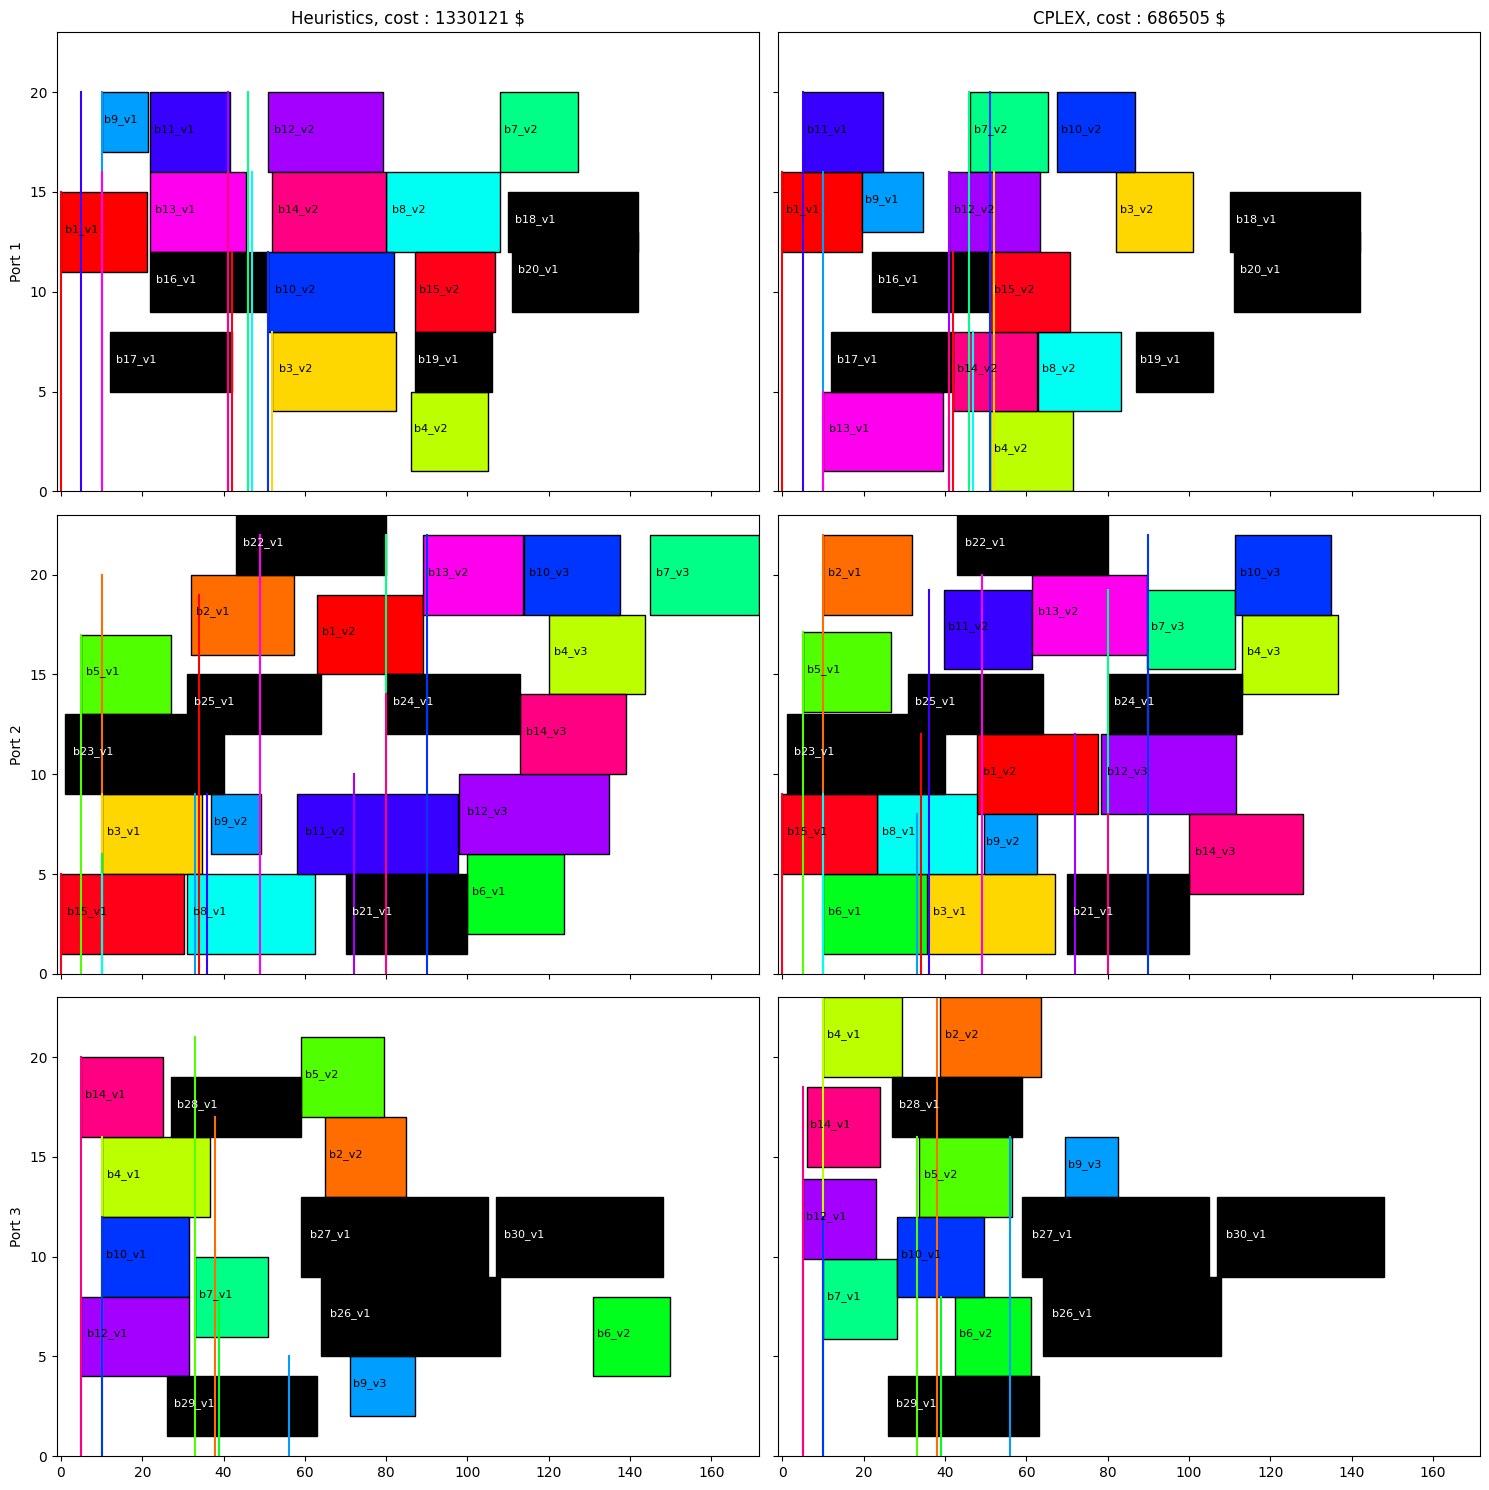

In [6]:
from make_graphs import *
getgraphs_port(algo_folder, exp, seed,Nin,Nout,qli)

### Get visu from iteration :

['[1,1]=12.0\r', '[1,2]=8.0\r', '[10,1]=8.0\r', '[10,2]=16.0\r', '[10,3]=18.0\r', '[11,1]=16.0\r', '[11,2]=15.25\r', '[12,1]=9.89342\r', '[12,2]=12.0\r', '[12,3]=8.0\r', '[13,1]=1.0\r', '[13,2]=16.0\r', '[14,1]=14.5\r', '[14,2]=4.0\r', '[14,3]=4.0\r', '[15,1]=5.0\r', '[15,2]=8.0\r', '[16,1]=9.0\r', '[17,1]=5.0\r', '[18,1]=12.0\r', '[19,1]=5.0\r', '[2,1]=18.0\r', '[2,2]=19.0\r', '[20,1]=9.0\r', '[21,1]=1.0\r', '[22,1]=20.0\r', '[23,1]=9.0\r', '[24,1]=12.0\r', '[25,1]=12.0\r', '[26,1]=5.0\r', '[27,1]=9.0\r', '[28,1]=16.0\r', '[29,1]=1.0\r', '[3,1]=1.0\r', '[3,2]=12.0\r', '[30,1]=9.0\r', '[4,1]=19.0\r', '[4,2]=0.0\r', '[4,3]=14.0\r', '[5,1]=13.125\r', '[5,2]=12.0\r', '[6,1]=1.0\r', '[6,2]=4.0\r', '[7,1]=5.89342\r', '[7,2]=16.0\r', '[7,3]=15.25\r', '[8,1]=5.0\r', '[8,2]=4.0\r', '[9,1]=13.0\r', '[9,2]=5.0\r', '[9,3]=13.0']


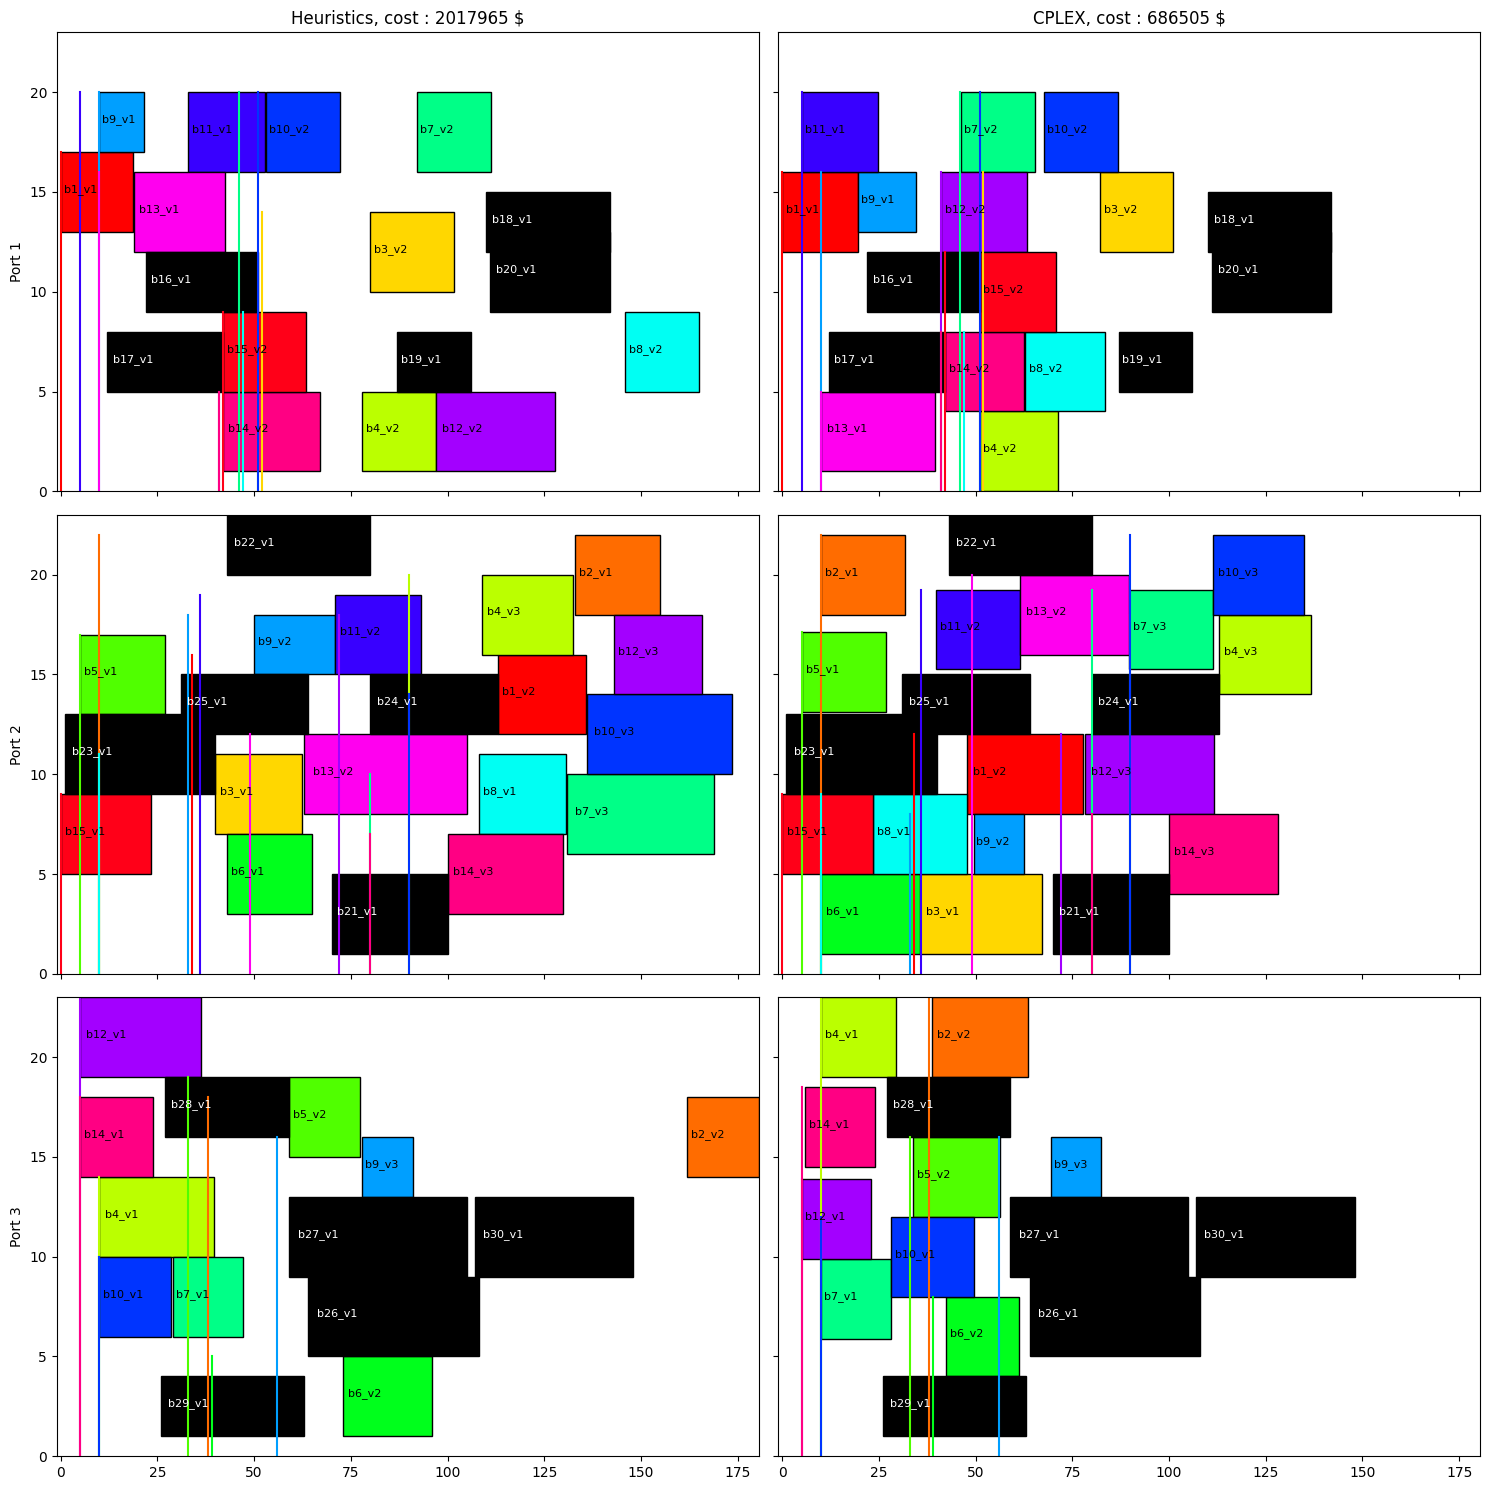

In [9]:
from make_graphs import *
nb_iter=38
getgraphs_port_withiter(algo_folder, exp, seed,Nin,Nout,qli,nb_iter)

## Cost analysis

- The cost of each visit in a bar graph with colors for each type of cost
- Looking at the time evolution (along iter) for the heuristic and the local search
- Same thing for the when evolution for each visit
- Same thing for the proba

--> Put everything, per solution and per iteration in a dataset.... (could use r)

In [12]:
dataset = make_datasetiter(algo_folder=algo_folder, exp=exp, seed=seed,Nin=Nin,Nout=Nout,qli=qli)
for col in ['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit','n','c', 'when']:
    dataset[col] = dataset[col].astype(int)

23    [0.3333, 0.3333, 0.3333]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype: object
23    [0.0, 0.5, 0.5]
Name: second, dtype

In [13]:
dataset

,iter,n,c,port,cost_visit,delay_cost_visit,when,tacticall_chosen,tacticboat_chosen,penalty_visit,...,fuel_cost_solheur,cost_sollocal,delay_cost_sollocal,waiting_cost_sollocal,penalty_sollocal,handling_cost_sollocal,fuel_cost_sollocal,timeheur,timelocal,failed
0,1,1,1,1,34226,6862,5,cost,time,0,...,447822.0,2580455.0,505857.0,55081.0,1426193.0,174881.0,418445.0,0.412,2.347,1.0
1,1,1,2,2,77990,16557,25,reconstruct,time,30380,...,447822.0,2580455.0,505857.0,55081.0,1426193.0,174881.0,418445.0,0.412,2.347,1.0
2,1,2,1,2,27884,9372,6,cost,time,0,...,447822.0,2580455.0,505857.0,55081.0,1426193.0,174881.0,418445.0,0.412,2.347,1.0
3,1,2,2,3,73322,17218,24,cost,time,38786,...,447822.0,2580455.0,505857.0,55081.0,1426193.0,174881.0,418445.0,0.412,2.347,1.0
4,1,3,1,2,43852,9664,25,reconstruct,time,0,...,447822.0,2580455.0,505857.0,55081.0,1426193.0,174881.0,418445.0,0.412,2.347,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,40,14,1,3,27899,0,21,cost,time,0,...,455190.0,1690554.0,304631.0,53422.0,774445.0,162801.0,395257.0,0.471,2.375,1.0
1436,40,14,2,1,49300,781,4,cost,time,0,...,455190.0,1690554.0,304631.0,53422.0,774445.0,162801.0,395257.0,0.471,2.375,1.0
1437,40,14,3,2,53682,13034,28,cost,time,6891,...,455190.0,1690554.0,304631.0,53422.0,774445.0,162801.0,395257.0,0.471,2.375,1.0
1438,40,15,1,2,190897,31525,30,reconstruct,time,134166,...,455190.0,1690554.0,304631.0,53422.0,774445.0,162801.0,395257.0,0.471,2.375,1.0


In [14]:
print("Nb of iteration :")
print(max(dataset['iter']))

Nb of iteration :
40


In [15]:
dataset.columns

Index(['iter', 'n', 'c', 'port', 'cost_visit', 'delay_cost_visit', 'when',
       'tacticall_chosen', 'tacticboat_chosen', 'penalty_visit',
       'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit',
       'length', 'calls', 'inst', 'objectif', 'cost_solheur',
       'delay_cost_solheur', 'waiting_cost_solheur', 'penalty_solheur',
       'handling_cost_solheur', 'fuel_cost_solheur', 'cost_sollocal',
       'delay_cost_sollocal', 'waiting_cost_sollocal', 'penalty_sollocal',
       'handling_cost_sollocal', 'fuel_cost_sollocal', 'timeheur', 'timelocal',
       'failed'],
      dtype='object')

### The cost for each visit during the heuristic :

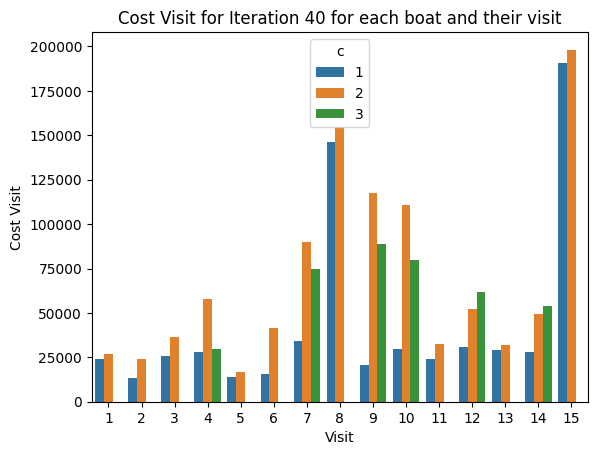

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset to only include the desired iteration and boats
subset = dataset[(dataset['iter'] == iteration_number) & (dataset['n'] <= Nin)]

# Create a new figure and axis object
fig, ax = plt.subplots()

# Use seaborn's barplot function to create the plot
sns.barplot(x='n', y='cost_visit', hue='c', data=subset, ax=ax)

# Set the title and axis labels
ax.set_title(f"Cost Visit for Iteration {iteration_number} for each boat and their visit")
ax.set_xlabel("Visit")
ax.set_ylabel("Cost Visit")

# Show the plot
plt.show()


### The stacked costs now :

C:\Users\kerve\AppData\Local\Temp\ipykernel_9116\3078143974.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iter[col] = df_iter[col].astype(int)


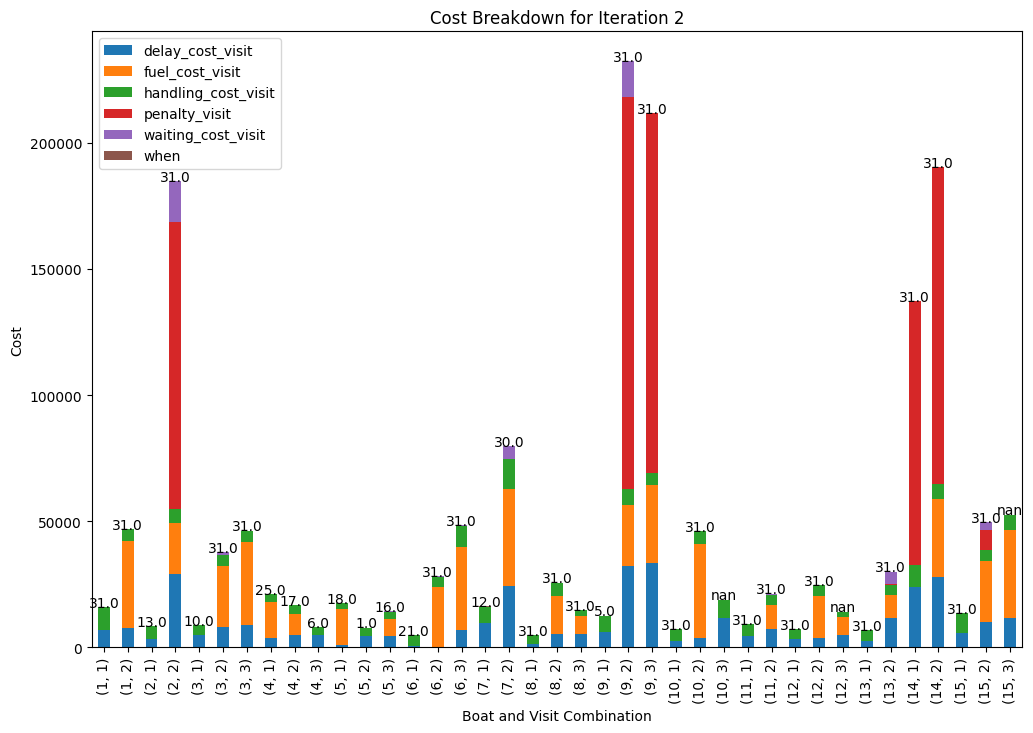

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# filter dataset for selected iteration
df_iter = dataset[dataset['iter'] == iter_to_plot]

for col in ['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit', 'n', 'c']:
    df_iter[col] = df_iter[col].astype(int)

# create a pivot table to group data by boat and visit
df_pivot = pd.pivot_table(df_iter[['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit', 'n', 'c', 'when']],
                           values=['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit', 'when'],
                           index=['n', 'c'])

# create stacked bar plot
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title
ax.set_xlabel('Boat and Visit Combination')
ax.set_ylabel('Cost')
ax.set_title(f'Cost Breakdown for Iteration {iter_to_plot}')



for i in range(0,len(ax.get_xticklabels())):
    p=ax.patches[i+5*len(ax.get_xticklabels())]
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    nc = ax.get_xticklabels()[i].get_text()
    ax.text(_x, _y, np.mean(df_iter[(df_iter['n']==int(nc.split(',')[0][1])) & (df_iter['c']==int(nc.split(',')[1][1]))]['when']), ha="center")
    


# show plot
plt.show()


### Now along all the iterations :

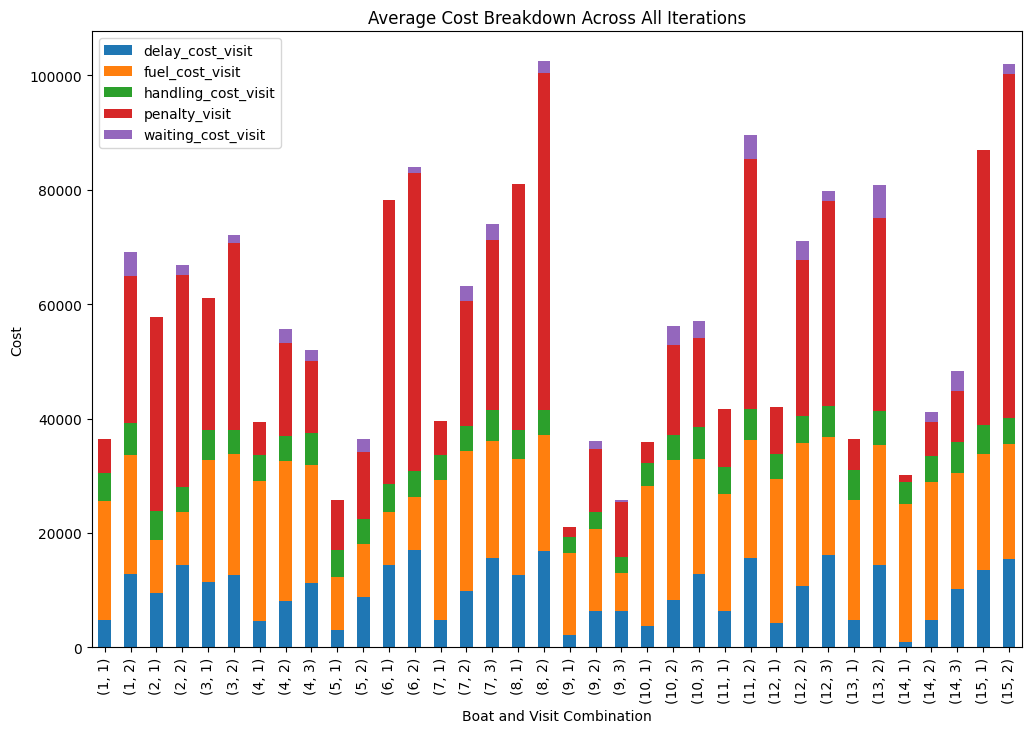

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# create a pivot table to group data by boat and visit, and calculate the mean of each cost across all iterations
df_pivot = pd.pivot_table(dataset, values=['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit'], index=['n', 'c'], aggfunc='mean')

# create stacked bar plot
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title
ax.set_xlabel('Boat and Visit Combination')
ax.set_ylabel('Cost')
ax.set_title('Average Cost Breakdown Across All Iterations')

# show plot
plt.show()


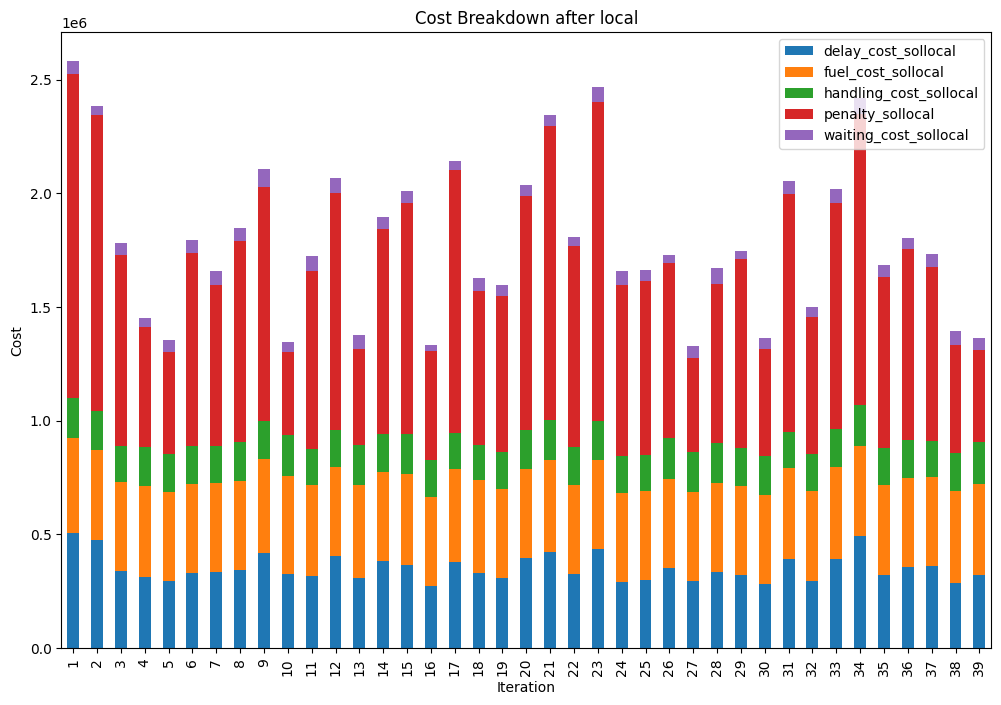

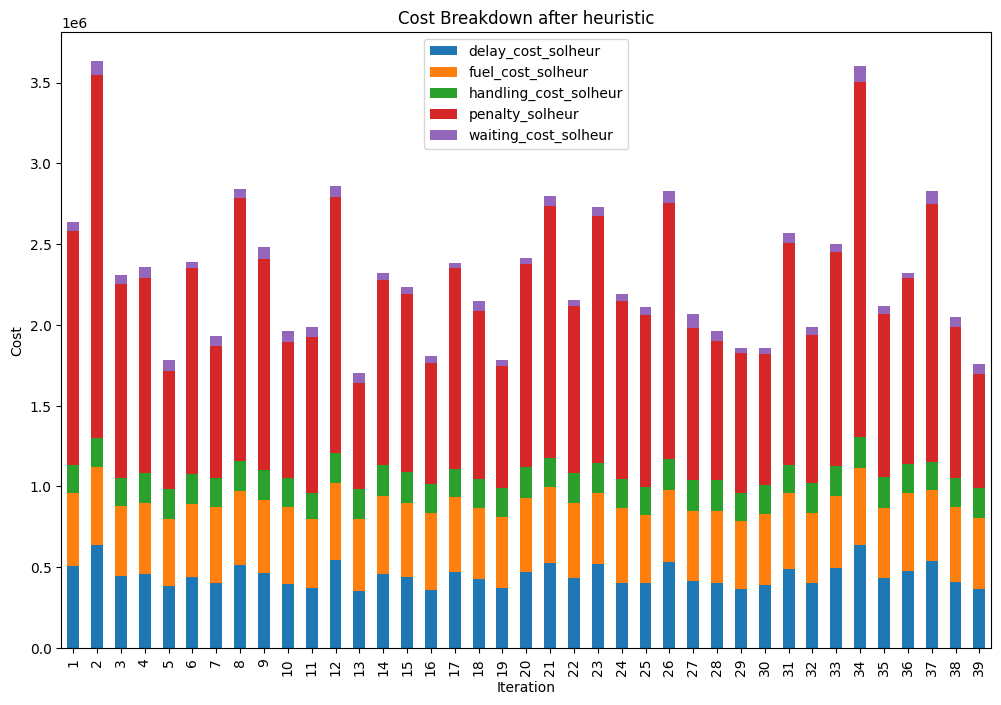

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# create dataset
dataset_subset = dataset[dataset['iter'] <= nb_iter]
# create pivot table for solocal columns
df_pivot_solocal = pd.pivot_table(dataset_subset, values=['delay_cost_sollocal', 'penalty_sollocal', 'fuel_cost_sollocal', 'handling_cost_sollocal', 'waiting_cost_sollocal'], index=['iter'])

# create pivot table for solheur columns
df_pivot_solheur = pd.pivot_table(dataset_subset, values=['delay_cost_solheur', 'penalty_solheur', 'fuel_cost_solheur', 'handling_cost_solheur', 'waiting_cost_solheur'], index=['iter'])

# create stacked bar plot for solocal columns
ax1 = df_pivot_solocal.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title for solocal columns
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax1.set_title('Cost Breakdown after local')

# create stacked bar plot for solheur columns
ax2 = df_pivot_solheur.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title for solheur columns
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Cost')
ax2.set_title('Cost Breakdown after heuristic')

# show plots
plt.show()


## When are they appearing  ?

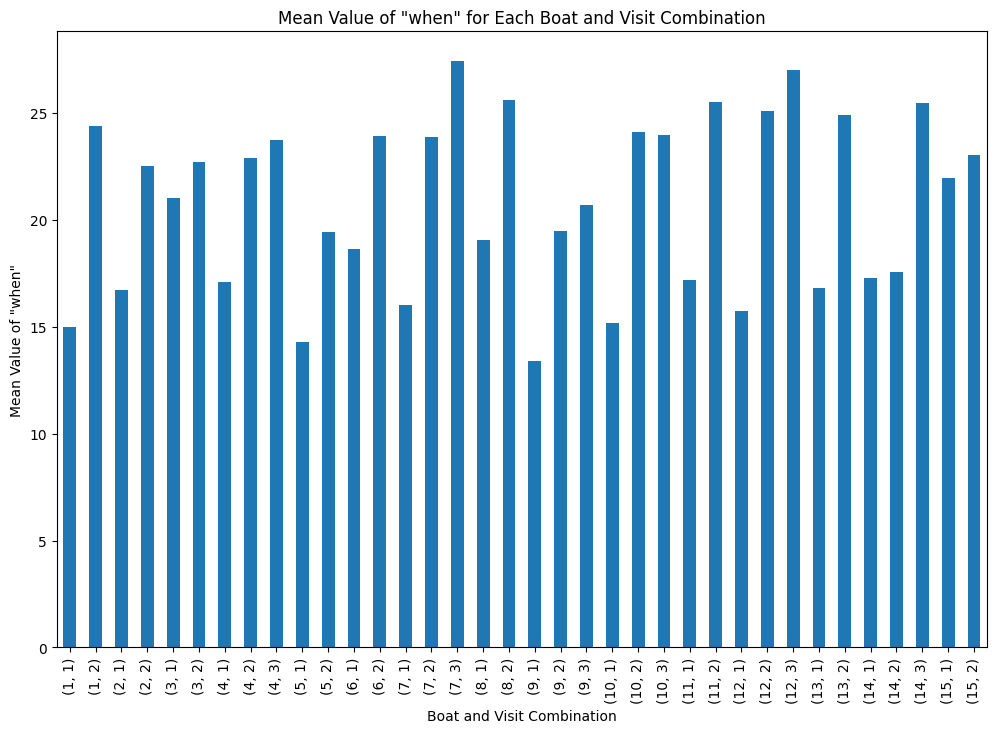

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


# calculate mean of 'when' column for each n/c combination
df_mean_when = dataset.groupby(['n', 'c'])['when'].mean()

# create bar plot
ax = df_mean_when.plot(kind='bar', figsize=(12, 8))

# add labels and title
ax.set_xlabel('Boat and Visit Combination')
ax.set_ylabel('Mean Value of "when"')
ax.set_title('Mean Value of "when" for Each Boat and Visit Combination')

# show plot
plt.show()


### What times for the Heuristic and the Local search ?

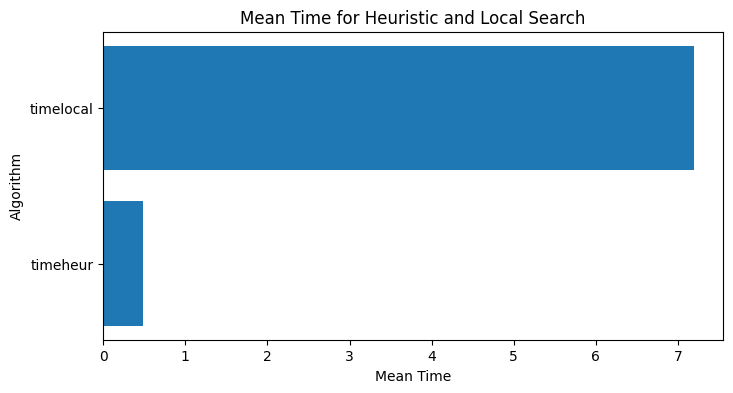

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate mean of timeheur and timelocal across all iterations
mean_timeheur = dataset['timeheur'].mean()
mean_timelocal = dataset['timelocal'].mean()

# plot horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(['timeheur', 'timelocal'], [mean_timeheur, mean_timelocal])
ax.set_xlabel('Mean Time')
ax.set_ylabel('Algorithm')
ax.set_title('Mean Time for Heuristic and Local Search')

plt.show()


### Main ideas from that already : 

- The reactive GRASP is not reactive at all, too much parameters and not enough simulations to update the probabilities.
- The penalty is really difficult to optimize for the greedy heuristic -> goal of the local search. Can we put more focus on that ?
- Regarding the when value, is it enough random ? If we remove some parameters how can implement the reactive GRASP ? Should it be reactive ? Should we for it to be more random ? 
- Add earliest
- Put hard constraint in CPLEX

Given the number of iterations -> difficult to make it reactive, better to have a fix parameters and optimize it. 